In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

import pickle

In [2]:
df = pd.read_csv("spam.csv")

In [3]:
df.head()

,category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,not spam,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,not spam,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,not spam,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,not spam,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

category         0
Message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
#to delete unwanted column permanently
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [7]:
df.head()

,category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


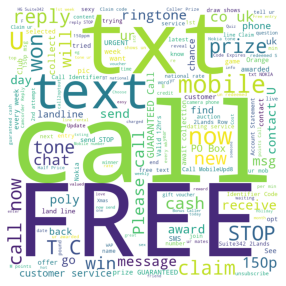

In [8]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10).generate(''.join(df[df["category"]=="spam"]["Message"]))
  
plt.figure(figsize = (5,5)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()


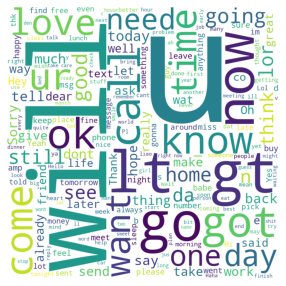

In [9]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10).generate(''.join(df[df["category"]=="not spam"]["Message"]))
  
plt.figure(figsize = (5,5)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [10]:
punc = list(punctuation)

stop_words = nltk.corpus.stopwords.words('english')

stop_words_punc = stop_words + punc

In [11]:
def preprocess_document(text):
     
    # lower the string and strip spaces    
    text = text.lower()
    text = text.strip()
    
    
    # tokenize the words in document
    word_tokens = nltk.WordPunctTokenizer().tokenize(text)
    
    # remove stopwords, punctuations
    # select tokens with only alphabets
    filtered_tokens = [token for token in word_tokens if token not in stop_words_punc]
    
    # join document from the tokens
    text = ' '.join(filtered_tokens)
    
    return text

In [12]:
df = df.rename(columns={"Message":"X","category":"y"})

In [13]:

df.head()

,y,X
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df["X"] = df["X"].apply(preprocess_document)

In [15]:
df.head()

,y,X
0,not spam,go jurong point crazy .. available bugis n gre...
1,not spam,ok lar ... joking wif u oni ...
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,not spam,u dun say early hor ... u c already say ...
4,not spam,nah think goes usf lives around though


In [16]:
X_train,X_test,y_train,y_test = train_test_split(df["X"],df["y"],test_size=0.3,random_state=1)

In [17]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [18]:
dt = DecisionTreeClassifier()

In [19]:

dt.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

In [20]:

y_pred = dt.predict(X_test_tfidf)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    not spam       0.97      0.98      0.98      1454
        spam       0.88      0.82      0.85       218

    accuracy                           0.96      1672
   macro avg       0.93      0.90      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [22]:
# save model

In [23]:
file1 = open("model.pkl","wb")
file2 = open("tfidf.pkl","wb")

In [24]:
pickle.dump(dt,file1)
pickle.dump(tfidf,file2)

In [25]:
file1.close()
file2.close()

In [26]:
file1 = open("model.pkl","rb")
file2 = open("tfidf.pkl","rb")

In [27]:
model=pickle.load(file1)
tfidf=pickle.load(file2)

In [28]:
msg="Hello, how are you"
msg_tfidf=tfidf.transform([msg])

In [29]:
model.predict(msg_tfidf)

array(['not spam'], dtype=object)

In [30]:
msg="FREE Money guaranteed return, claim now"
msg_tfidf=tfidf.transform([msg])

In [31]:
model.predict(msg_tfidf)

array(['spam'], dtype=object)

In [32]:
model.predict(msg_tfidf)[0]

'spam'

In [33]:
def predict_sms(msg):
    msg_tfidf=tfidf.transform([msg])
    result=model.predict(msg_tfidf)[0]
    return result
    

In [34]:
predict_sms("FREE Money guaranteed return, claim now")

'spam'

In [35]:
predict_sms("Hello, how are you")

'not spam'